<a href="https://colab.research.google.com/github/NishmithaJR/Data-Analytics-Project/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Analytics/pcos_prediction_dataset.csv")
df

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,Guinea,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,Mozambique,35,Overweight,Regular,No,NaN,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,Cambodia,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,Benin,15,Obese,Regular,Yes,NaN,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No


**How many women are diagnosed with PCOS?**

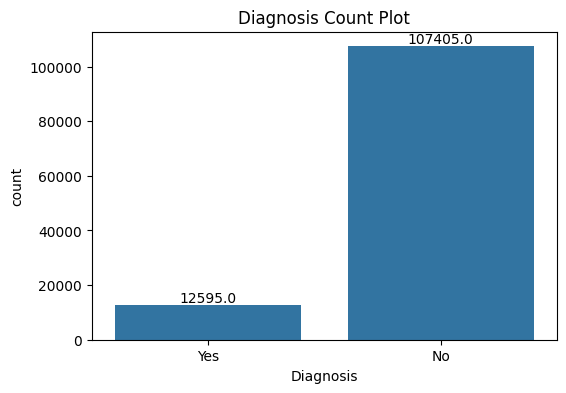

In [ ]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Diagnosis").set_title('Diagnosis Count Plot')

# Add counts on top of the bars
ax = fig.axes[0]
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**In which country are the highest cases of PCOS found?**

/tmp/ipython-input-31-1258402937.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_yes_counts, x='Diagnosis_Yes_Count', y='Country', palette='viridis')


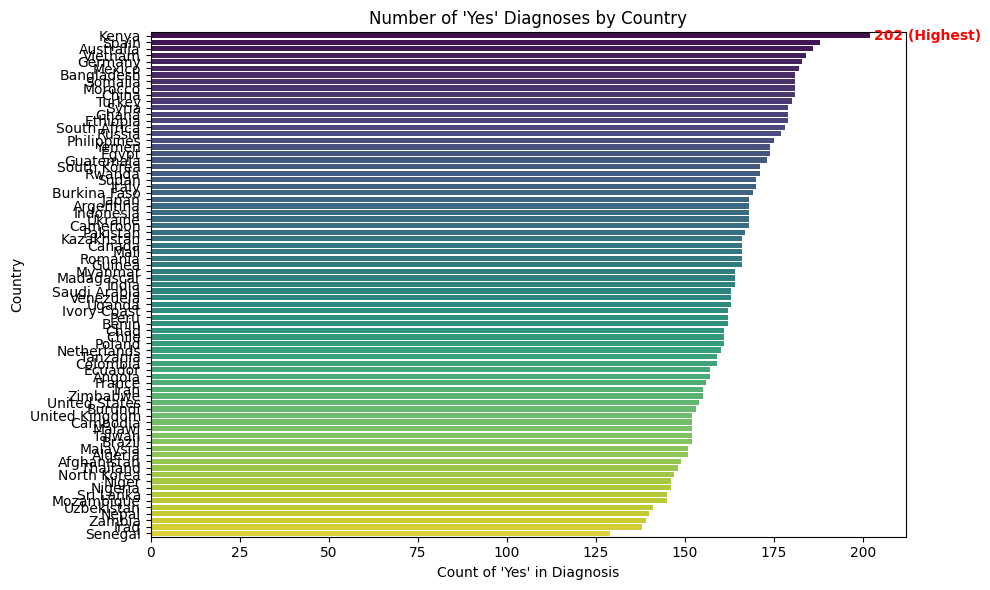

In [ ]:
# Clean and normalize column values
df['Diagnosis'] = df['Diagnosis'].astype(str).str.strip().str.capitalize()
df['Country'] = df['Country'].astype(str).str.strip()

# Filter rows where Diagnosis is 'Yes'
yes_df = df[df['Diagnosis'] == 'Yes']

# Count number of 'Yes' per country
country_yes_counts = yes_df['Country'].value_counts().reset_index()
country_yes_counts.columns = ['Country', 'Diagnosis_Yes_Count']

# Identify the top country
top_country = country_yes_counts.iloc[0]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=country_yes_counts, x='Diagnosis_Yes_Count', y='Country', palette='viridis')

# Highlight the top country with annotation
plt.title("Number of 'Yes' Diagnoses by Country")
plt.xlabel("Count of 'Yes' in Diagnosis")
plt.ylabel("Country")

# Annotate the highest bar
plt.text(
    top_country['Diagnosis_Yes_Count'] + 1,
    country_yes_counts[country_yes_counts['Country'] == top_country['Country']].index[0],
    f"{top_country['Diagnosis_Yes_Count']} (Highest)",
    va='center',
    color='red',
    fontweight='bold'
)
plt.tight_layout()
plt.show()

**How many women that are diagnosed with PCOS have regular menstruation and irregular menstruation?**

/tmp/ipython-input-44-610433868.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=cycle_counts, x='Cycle_Type', y='Count', palette='coolwarm')


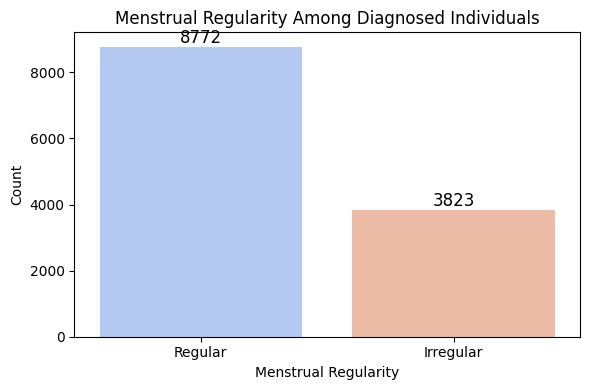

In [ ]:
# Clean and standardize the relevant columns
df['Diagnosis'] = df['Diagnosis'].astype(str).str.strip().str.capitalize()
df['Menstrual Regularity'] = df['Menstrual Regularity'].astype(str).str.strip().str.capitalize()

# Filter data: only diagnosed individuals
diagnosed_df = df[df['Diagnosis'] == 'Yes']

# Count menstrual regularity types among diagnosed individuals
cycle_counts = diagnosed_df['Menstrual Regularity'].value_counts().reset_index()
cycle_counts.columns = ['Cycle_Type', 'Count']

# Plot with count annotations
plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=cycle_counts, x='Cycle_Type', y='Count', palette='coolwarm')
plt.title("Menstrual Regularity Among Diagnosed Individuals")
plt.xlabel("Menstrual Regularity")
plt.ylabel("Count")

# Annotate bars with counts
for i in barplot.containers:
    barplot.bar_label(i, label_type='edge', fontsize=12)

plt.tight_layout()
plt.show()

**How many women diagnosed with PCOS have family history of PCOS?**

/tmp/ipython-input-47-3347841628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosed_df['Family History of PCOS'] = diagnosed_df['Family History of PCOS'].astype(str).str.strip().str.capitalize()
/tmp/ipython-input-47-3347841628.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=family_history_counts, x='Family_History', y='Count', palette='Set3')


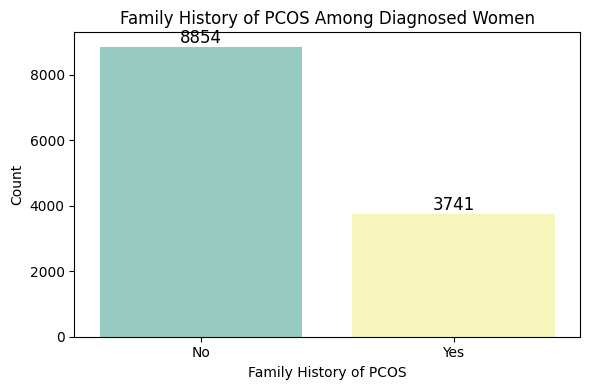

In [ ]:
# Filter only diagnosed individuals
diagnosed_df = df[df['Diagnosis'] == 'Yes']

# Clean the 'Family History of PCOS' column
diagnosed_df['Family History of PCOS'] = diagnosed_df['Family History of PCOS'].astype(str).str.strip().str.capitalize()

# Count those with and without family history among diagnosed
family_history_counts = diagnosed_df['Family History of PCOS'].value_counts().reset_index()
family_history_counts.columns = ['Family_History', 'Count']

# Plot with count annotations
plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=family_history_counts, x='Family_History', y='Count', palette='Set3')
plt.title("Family History of PCOS Among Diagnosed Women")
plt.xlabel("Family History of PCOS")
plt.ylabel("Count")

# Annotate bars with counts
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge', fontsize=12)

plt.tight_layout()
plt.show()

**At what age are most women diagnosed with PCOS?**

/tmp/ipython-input-48-1658516290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosed_df['Age Group'] = pd.cut(diagnosed_df['Age'], bins=age_bins, labels=age_labels, right=True)
/tmp/ipython-input-48-1658516290.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=age_group_counts, x='Age Group', y='Count', palette='Accent')


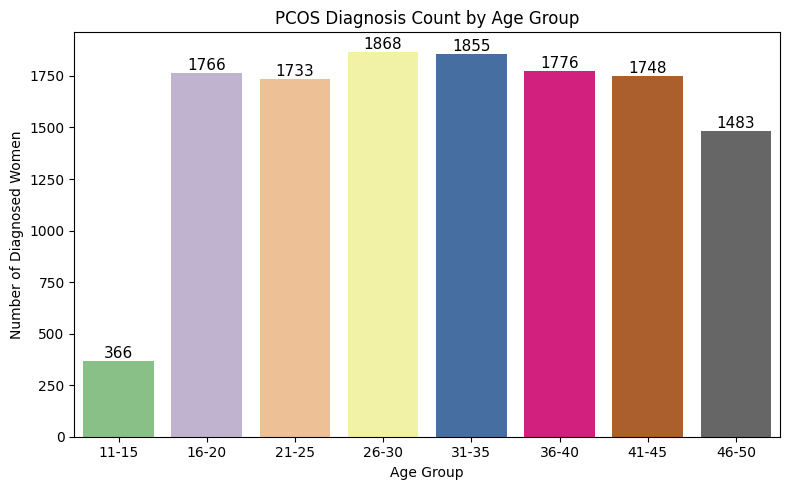

In [ ]:
df['Diagnosis'] = df['Diagnosis'].astype(str).str.strip().str.capitalize()

# Filter diagnosed cases
diagnosed_df = df[df['Diagnosis'] == 'Yes']

# Create age groups
age_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50]
age_labels = ['11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
diagnosed_df['Age Group'] = pd.cut(diagnosed_df['Age'], bins=age_bins, labels=age_labels, right=True)

# Count diagnoses by age group
age_group_counts = diagnosed_df['Age Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Plot the graph
plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=age_group_counts, x='Age Group', y='Count', palette='Accent')
plt.title("PCOS Diagnosis Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Diagnosed Women")

# Add count labels on bars
for container in barplot.containers:
    barplot.bar_label(container, label_type='edge', fontsize=11)

plt.tight_layout()
plt.show()